CLASSIFICATION
Classification is a technique in data mining to classify data based on data attachment to sample data. The classification algorithm will train f(x) so that it will produce an output in the form of a label (y) with an input in the form of x. There are many methods for classification, and the one we will use today is the decision tree.

STUDY CASE : Loan Eligibility Dataset
Simply put, the Company wants to automate the Loan Eligibility Process in real-time scenarios related to customer details provided when applying for a home loan form.
https://www.kaggle.com/vikasukani/loan-eligible-dataset

Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

Read Dataset

In [3]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/mridulrb/Predict-loan-eligibility-using-IBM-Watson-Studio/master/Dataset/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Check Missing Value

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#drop missing value
df = df.dropna()

#set index with 'Loan_ID' and remove 'Loan_ID' column
df = df.set_index(df['Loan_ID'])
df = df.drop(labels = 'Loan_ID', axis=1)

#make credit history as object
df['Credit_History'] = df['Credit_History'].astype('object')

In [6]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, LP001003 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    object 
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 68.8+ KB


Visualization

In [7]:
#show value count of Loan Status
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

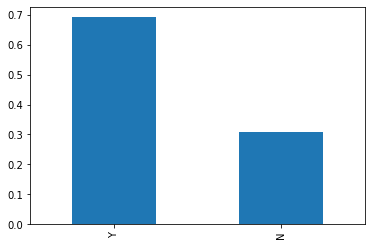

In [8]:
#Visualization of Loan Status with bar plot
df['Loan_Status'].value_counts(normalize=True).plot.bar()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


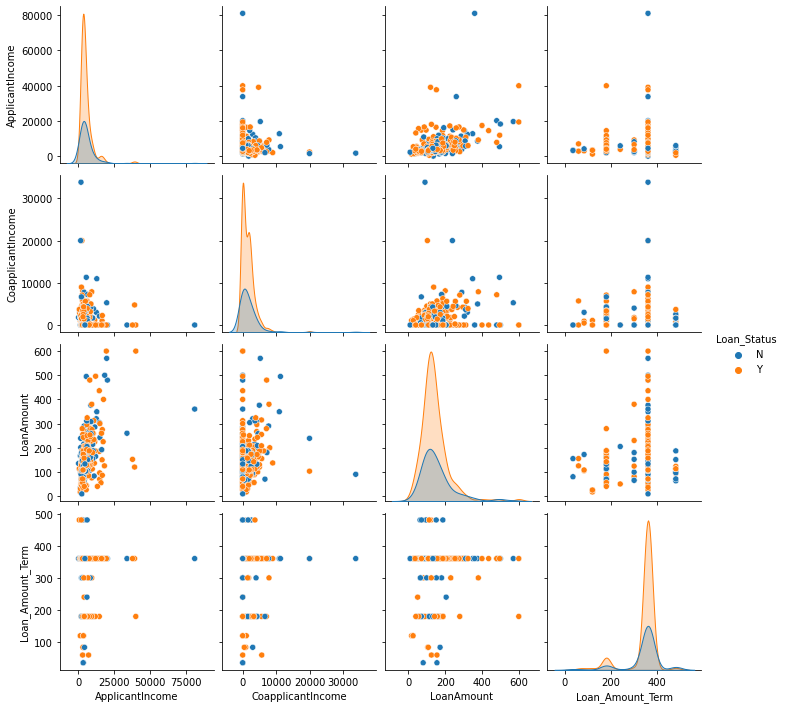

In [9]:
num_cols = df._get_numeric_data().columns
df_num = df[num_cols]
df_num['Loan_Status'] = df['Loan_Status']

#Matrixplot
sns.pairplot(data=df_num, hue='Loan_Status');

Feature Engineer

In [10]:
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['LoanAmount_perTerm'] = df['LoanAmount']/df['Loan_Amount_Term']

Label Encoder

In [11]:
cat_cols = df.select_dtypes(include='object').columns
for feature in cat_cols:
  print(feature, ":", df[feature].unique())

Gender : ['Male' 'Female']
Married : ['Yes' 'No']
Dependents : ['1' '0' '2' '3+']
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes']
Credit_History : [1.0 0.0]
Property_Area : ['Rural' 'Urban' 'Semiurban']
Loan_Status : ['N' 'Y']


In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Income,LoanAmount_perTerm,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,,,,,
LP001003,4583,1508.0,128.0,360.0,6091.0,0.355556,1,1,1,0,0,0,0,1,0,0,0
LP001005,3000,0.0,66.0,360.0,3000.0,0.183333,1,1,0,0,0,0,1,1,0,1,1
LP001006,2583,2358.0,120.0,360.0,4941.0,0.333333,1,1,0,0,0,1,0,1,0,1,1
LP001008,6000,0.0,141.0,360.0,6000.0,0.391667,1,0,0,0,0,0,0,1,0,1,1
LP001011,5417,4196.0,267.0,360.0,9613.0,0.741667,1,1,0,1,0,0,1,1,0,1,1


In [14]:
df = df.rename(columns={'Loan_Status_Y':'Loan_Status'})

Train Test Split

In [15]:
y = df['Loan_Status']
x = df.drop(['Loan_Status'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2021)

Decision Tree Classifier

In [16]:
DecisionTree = DecisionTreeClassifier(random_state=2021)
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

In [17]:
DecisionTree.score(x_train, y_train)

1.0

In [18]:
pred = DecisionTree.predict(x_test)
pred

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0], dtype=uint8)

In [19]:
DecisionTree.score(x_test, y_test)

0.75

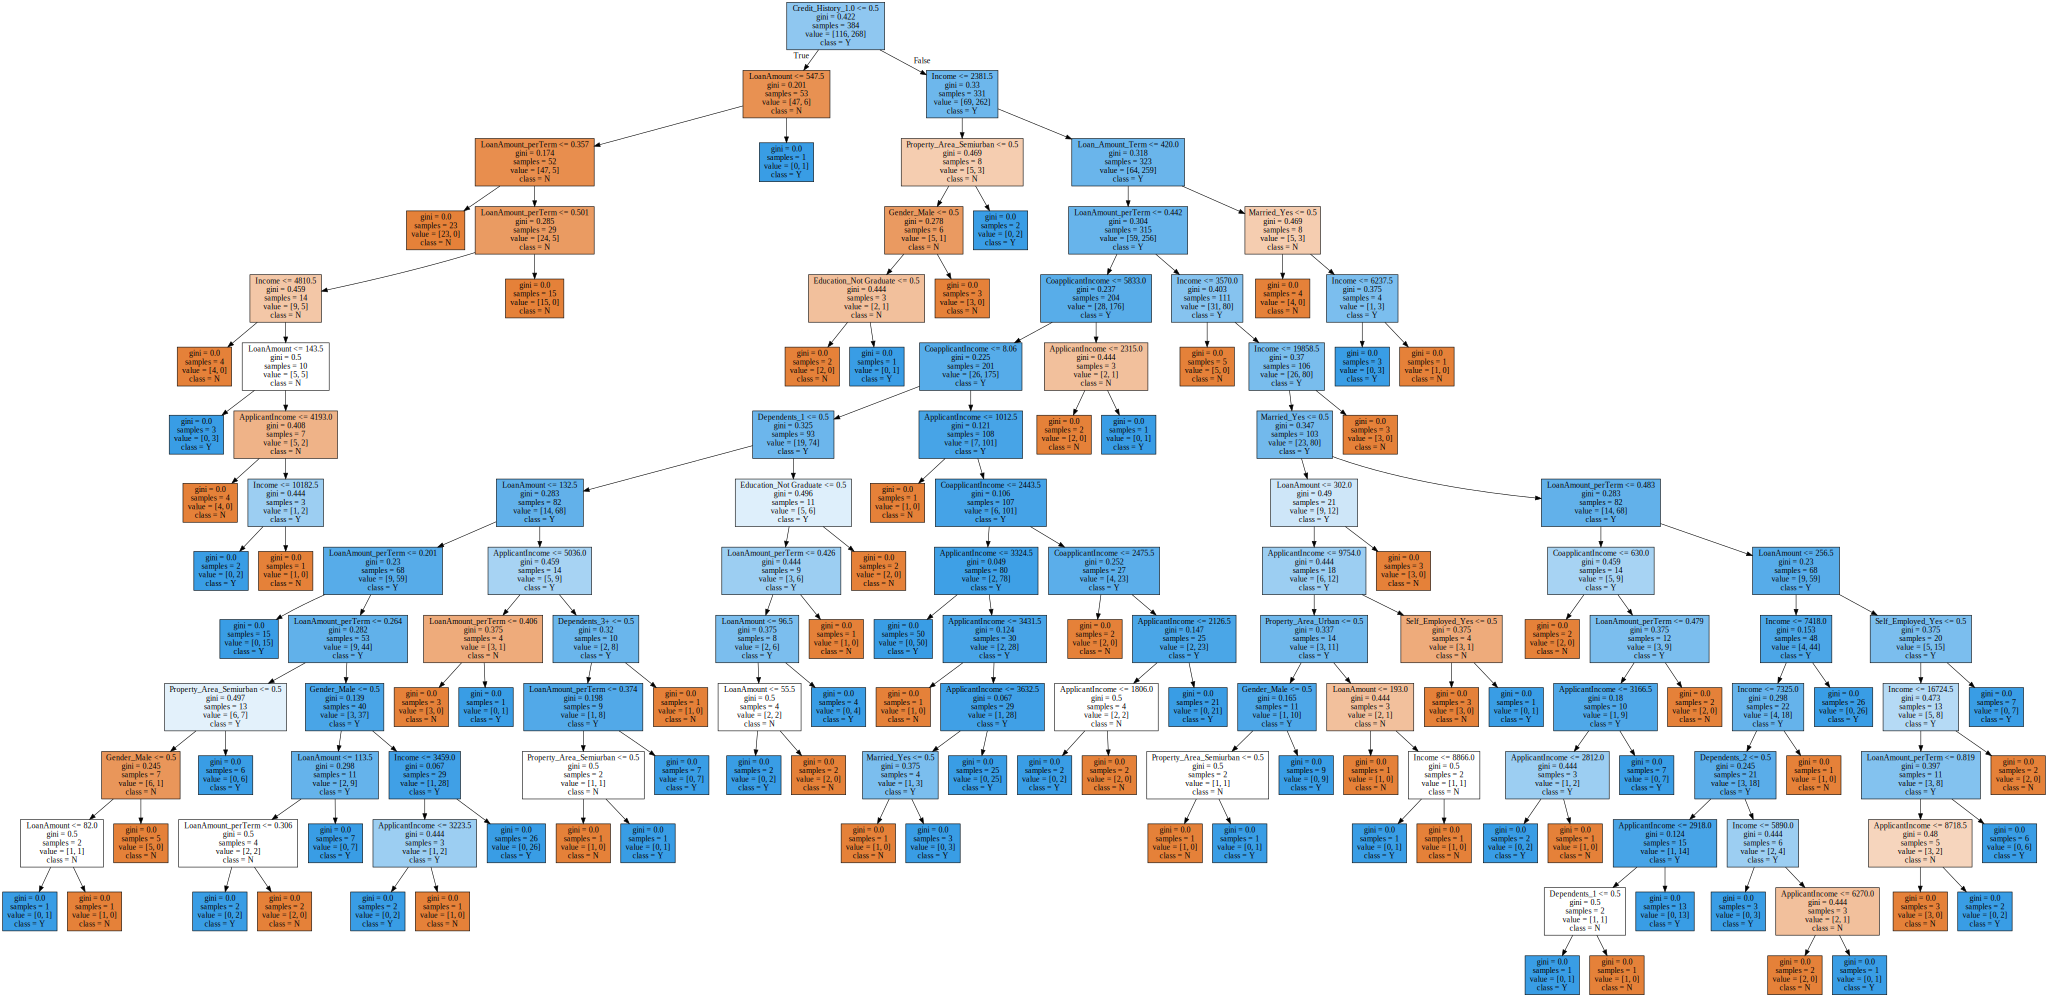

In [20]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(DecisionTree, out_file=None,
                                feature_names=list(x_train.columns),
                                class_names=['N','Y'],
                                filled=True)
graph = graphviz.Source(dot_data)
graph

Feature Importance

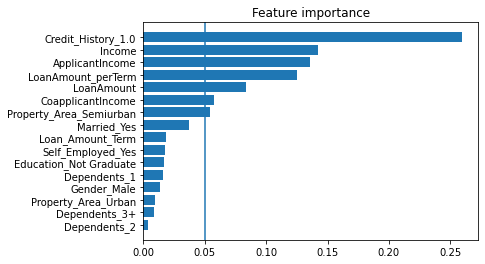

In [21]:
imp = DecisionTree.feature_importances_
imp = pd.DataFrame(imp, index = x_train.columns, columns=['importance'])
imp.sort_values("importance", inplace=True, ascending=True)

plt.title("Feature importance")
plt.barh(imp.index, imp.importance)
plt.axvline(x=0.05)
plt.show()

In [22]:
col_imp = imp[imp['importance'] > 0.05].index
col_imp

Index(['Property_Area_Semiurban', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmount_perTerm', 'ApplicantIncome', 'Income',
       'Credit_History_1.0'],
      dtype='object')

In [23]:
col_imp = col_imp.delete(0)

In [24]:
x_train_imp = x_train[col_imp]
x_test_imp = x_test[col_imp]
x_train_imp.head()

,CoapplicantIncome,LoanAmount,LoanAmount_perTerm,ApplicantIncome,Income,Credit_History_1.0
Loan_ID,,,,,,
LP002407,0.0,138.0,0.383333,7142,7142.0,1
LP002494,0.0,140.0,0.388889,6000,6000.0,1
LP002337,0.0,60.0,0.166667,2995,2995.0,1
LP002841,2064.0,104.0,0.288889,3166,5230.0,0
LP001940,1560.0,134.0,0.372222,3153,4713.0,1


In [25]:
DecisionTree_imp = DecisionTreeClassifier(random_state=2021)
DecisionTree_imp.fit(x_train_imp, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

In [26]:
DecisionTree_imp.score(x_train_imp, y_train)

1.0

In [27]:
pred_imp = DecisionTree_imp.predict(x_test_imp)

In [28]:
DecisionTree_imp.score(x_test_imp, y_test)

0.7708333333333334

Tuning Model

In [32]:
def GridSearch(x, y, model, parameters):
  clf = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
  clf.fit(x, y)
  print("Best Score: "+str(clf.best_score_))
  print("Best Params: "+str(clf.best_params_))
  return(clf)

In [33]:
ListParams = {
    'criterion': ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_features':['auto','sqrt','log2',None],
    'max_depth':[3,6,9],
    'class_weight':['balanced',None]
}

In [34]:
BestDecisionTree = GridSearch(x_train, y_train, DecisionTreeClassifier(random_state=2021), ListParams)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8098769651401231
Best Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'splitter': 'random'}


[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.1s finished


In [35]:
BestDecisionTree.score(x_train, y_train)

0.8177083333333334

In [36]:
BestDecisionTree.score(x_test, y_test)

0.8125

Tuning Model with Importance

In [37]:
BestDecisionTree_imp = GridSearch(x_train_imp, y_train, DecisionTreeClassifier(random_state=2021), ListParams)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8020847573479152
Best Params: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'random'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    2.1s finished


In [38]:
BestDecisionTree_imp.score(x_train_imp, y_train)

0.8072916666666666

In [39]:
BestDecisionTree_imp.score(x_test_imp, y_test)

0.8229166666666666